## New Density Coronal File

In [1]:
# import library
import pandas as pd
import numpy as np

# to order a dictionary 
from collections import OrderedDict

# for heat map
import seaborn as sns

# for statistics and correlations
from scipy import stats
from scipy.stats import spearmanr, pearsonr

# for train and test data split
from sklearn.model_selection import train_test_split

# for scikic learn metrices
from sklearn import metrics

# for normalization
from sklearn.preprocessing import StandardScaler

# for PCA two different packages
from sklearn.decomposition import PCA
#from pca import pca

# for principal factor analysis
#from factor_analyzer import FactorAnalyzer

# for plotting
import matplotlib.pyplot as plt
#from mpl_toolkits import mplot3d

# for kmean clustering
#from sklearn.cluster import KMeans
#from sklearn.metrics import completeness_score, homogeneity_score

#from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# load the file
denCoral = pd.read_csv("../NewDenC.csv")

### we see total 4350 gene for this file

In [3]:
# print the head of file
denCoral.head()

,Unnamed: 0,voxRowNum,Structure-ID,X,Y,Z,Snap47-3,Nvl-5,Gtf3c2-7,Pcdh9-10,...,Med23-112649261,Dvl2-112649476,Gpr35-112649690,Hnrnph2-112649906,Ebpl-112650122,Drd4-112650336,Dhrs3-112650553,Pla2g16-112650769,S1pr5-112651200,Thbs4-112651416
0,0,51174,852,53,25,18,0.049298,0.005456,0.001584,0.006610,...,0.005671,0.001096,0.003656,0.002787,0.003060,0.002063,0.001602,0.030698,0.022748,0.000909
1,1,51787,136,63,34,18,0.016131,0.000005,-1.000000,0.000057,...,0.005171,0.000336,0.000094,0.000920,0.002179,-1.000000,0.004738,0.034836,0.022520,0.000719
2,2,53921,852,53,25,19,0.058351,0.006207,0.001926,0.008608,...,0.007492,0.001398,0.002801,0.003550,0.004509,0.003968,0.001627,0.025376,0.022739,0.001180
3,3,53988,852,53,26,19,0.064874,0.007212,0.002101,0.007624,...,0.008601,0.001534,0.002396,0.004024,0.004098,0.005180,0.001310,0.026157,0.025914,0.000676
4,4,54466,136,62,33,19,0.080416,0.000754,0.000002,0.000869,...,0.017324,0.004695,0.000218,0.001845,0.017186,0.002737,-1.000000,0.052242,0.036244,-1.000000


### total number of rows  : 1465  which makes total 1465 voxels having below unique 
### Structure ID's : [ 852, 136, 1098,  661,  978, 1107, 1048,  939,  143,  307,  970,  773,  235]

In [4]:
print("Total number of Rows::{}".format(len(denCoral.index)))                     # total number of rows in the file
print("Total number of voxels::{}".format(len(denCoral['voxRowNum'].unique())))   # total number of unique voxels
print("Unique Stucture Ids::{}".format(denCoral['Structure-ID'].unique()))               # print the unique structure ids

Total number of Rows::1465
Total number of voxels::1465
Unique Stucture Ids::[ 852  136 1098  661  978 1107 1048  939  143  307  970  773  235]


### Removing the columns that are not needed as of now
### ['Unnamed: 0', 'voxRowNum', 'Structure-ID', 'X', 'Y', 'Z']

In [5]:
# remove the unwanted columns
columnNames = list(denCoral.columns.values)
rmCols = columnNames[0:6]
dCorReduc = denCoral.drop(columns=rmCols)

In [6]:
# print the data
dCorReduc

,Snap47-3,Nvl-5,Gtf3c2-7,Pcdh9-10,Ndufv3-12,Mageh1-17,Cdca7-26,Prkag2-29,Dopey2-31,Anln-33,...,Med23-112649261,Dvl2-112649476,Gpr35-112649690,Hnrnph2-112649906,Ebpl-112650122,Drd4-112650336,Dhrs3-112650553,Pla2g16-112650769,S1pr5-112651200,Thbs4-112651416
0,0.049298,5.456321e-03,0.001584,0.006610,0.013284,-1.000000,0.053440,0.012146,0.021524,0.053927,...,0.005671,0.001096,0.003656,0.002787,0.003060,0.002063,0.001602,0.030698,0.022748,0.000909
1,0.016131,4.967356e-06,-1.000000,0.000057,0.000507,0.000013,0.032885,0.000708,-1.000000,0.015502,...,0.005171,0.000336,0.000094,0.000920,0.002179,-1.000000,0.004738,0.034836,0.022520,0.000719
2,0.058351,6.206725e-03,0.001926,0.008608,0.014988,-1.000000,0.066271,0.013376,0.028395,0.049347,...,0.007492,0.001398,0.002801,0.003550,0.004509,0.003968,0.001627,0.025376,0.022739,0.001180
3,0.064874,7.211543e-03,0.002101,0.007624,0.013281,-1.000000,0.094744,0.011277,0.033569,0.046560,...,0.008601,0.001534,0.002396,0.004024,0.004098,0.005180,0.001310,0.026157,0.025914,0.000676
4,0.080416,7.535656e-04,0.000002,0.000869,-1.000000,0.000229,0.134978,0.007825,-1.000000,0.061402,...,0.017324,0.004695,0.000218,0.001845,0.017186,0.002737,-1.000000,0.052242,0.036244,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,0.095673,2.954238e-03,0.000562,0.006078,0.019622,-1.000000,0.052649,0.008394,0.015372,0.034725,...,0.014353,0.002473,0.003359,0.001892,0.008621,0.014343,0.003434,0.024842,0.023014,0.000607
1461,0.101216,3.393501e-03,0.000341,0.003103,0.023130,-1.000000,0.070607,0.006642,0.016625,0.035228,...,0.011905,0.002264,0.002392,0.002535,0.007288,0.017576,0.003143,0.024228,0.024685,0.002463
1462,0.008409,4.273420e-05,0.000002,0.002841,-1.000000,0.000076,0.042841,0.004549,-1.000000,0.034629,...,0.017258,0.009445,0.000278,0.004004,0.025725,-1.000000,-1.000000,0.049206,0.030134,-1.000000
1463,0.077746,2.839008e-03,0.000330,0.004332,0.021206,-1.000000,0.043658,0.007527,0.015593,0.037731,...,0.012618,0.003408,0.003491,0.002832,0.008307,0.012742,0.005355,0.024159,0.023328,0.000517


In [7]:
dCorReduc.describe()

,Snap47-3,Nvl-5,Gtf3c2-7,Pcdh9-10,Ndufv3-12,Mageh1-17,Cdca7-26,Prkag2-29,Dopey2-31,Anln-33,...,Med23-112649261,Dvl2-112649476,Gpr35-112649690,Hnrnph2-112649906,Ebpl-112650122,Drd4-112650336,Dhrs3-112650553,Pla2g16-112650769,S1pr5-112651200,Thbs4-112651416
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,...,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,0.067963,0.001436,-0.142598,-0.015142,-0.081713,-0.256681,0.084527,-0.000239,-0.208146,0.017612,...,-0.065477,0.003600,-0.073604,-0.082799,-0.181865,-0.411000,-0.274201,-0.064291,-0.072229,-0.169218
std,0.180662,0.069518,0.350850,0.147361,0.304629,0.437704,0.114882,0.126581,0.429048,0.166969,...,0.263768,0.026535,0.262744,0.281477,0.402307,0.496304,0.448041,0.312882,0.310012,0.376071
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.075780,0.003431,0.000076,0.002064,0.008411,-1.000000,0.080957,0.009973,0.000405,0.035019,...,0.005512,0.001703,0.000132,0.001906,0.004463,-1.000000,-1.000000,0.027216,0.024715,0.000170
50%,0.108202,0.006028,0.000505,0.004407,0.017497,0.000299,0.102529,0.014785,0.012919,0.044244,...,0.007209,0.002892,0.000321,0.002745,0.010638,0.001329,0.000651,0.037206,0.030871,0.000460
75%,0.126565,0.008559,0.001069,0.009470,0.024954,0.000870,0.118099,0.019225,0.035039,0.053641,...,0.010293,0.005079,0.000854,0.003811,0.018974,0.005681,0.001517,0.044484,0.034960,0.000887
max,0.151016,0.023974,0.005262,0.038648,0.067246,0.006954,0.161022,0.052053,0.074802,0.101623,...,0.036392,0.029583,0.011159,0.080278,0.065582,0.034699,0.092234,0.168930,0.051216,0.025787


### There are 12 genes that have -1 for all the records which means these genes are not expressive at all so we will be removing them first

In [8]:
colsWithNull = dCorReduc.columns[dCorReduc.eq(-1).all()] # in this data set -1 is null
colsWithNull

Index(['Col6a1-290', 'Prkcz-841', 'Sst-1001', 'Ywhag-1124', 'Adrm1-2019',
       'Crat-2119', 'Fbln1-2205', 'Ndufs1-2421', 'Traf7-2527', 'Pim2-32583',
       'Limk2-61002', 'Bcap29-104826'],
      dtype='object')

In [9]:
# remove the null columns
dCorReduc.drop(columns=colsWithNull,inplace=True)
dCorReduc.head()

,Snap47-3,Nvl-5,Gtf3c2-7,Pcdh9-10,Ndufv3-12,Mageh1-17,Cdca7-26,Prkag2-29,Dopey2-31,Anln-33,...,Med23-112649261,Dvl2-112649476,Gpr35-112649690,Hnrnph2-112649906,Ebpl-112650122,Drd4-112650336,Dhrs3-112650553,Pla2g16-112650769,S1pr5-112651200,Thbs4-112651416
0,0.049298,0.005456,0.001584,0.006610,0.013284,-1.000000,0.053440,0.012146,0.021524,0.053927,...,0.005671,0.001096,0.003656,0.002787,0.003060,0.002063,0.001602,0.030698,0.022748,0.000909
1,0.016131,0.000005,-1.000000,0.000057,0.000507,0.000013,0.032885,0.000708,-1.000000,0.015502,...,0.005171,0.000336,0.000094,0.000920,0.002179,-1.000000,0.004738,0.034836,0.022520,0.000719
2,0.058351,0.006207,0.001926,0.008608,0.014988,-1.000000,0.066271,0.013376,0.028395,0.049347,...,0.007492,0.001398,0.002801,0.003550,0.004509,0.003968,0.001627,0.025376,0.022739,0.001180
3,0.064874,0.007212,0.002101,0.007624,0.013281,-1.000000,0.094744,0.011277,0.033569,0.046560,...,0.008601,0.001534,0.002396,0.004024,0.004098,0.005180,0.001310,0.026157,0.025914,0.000676
4,0.080416,0.000754,0.000002,0.000869,-1.000000,0.000229,0.134978,0.007825,-1.000000,0.061402,...,0.017324,0.004695,0.000218,0.001845,0.017186,0.002737,-1.000000,0.052242,0.036244,-1.000000


### All the genes displaying total no of -1 values or in other words not responding to total no of voxels

In [10]:
# get the column names
# and create a dictionary with columns having total -1
columnNames = list(dCorReduc.columns.values)
# dictionary to contain genes that has atleast 1 -1
colSumNull = {} 
# dictionary to contain all genes with total no of -1's
colSumNullAll = {}

# loop to populate the dictionary
for col in columnNames:
    cTot = dCorReduc[col].eq(-1).sum()
    colSumNullAll[col] = cTot
    if cTot > 0:
        colSumNull[col] = cTot

# transform to a dataframe to print better
#new = pd.DataFrame.from_dict(colSumNull, orient = 'index')
new = pd.DataFrame(colSumNull, index=[0])
new.index = ['TotalNoOf-1']
new

,Snap47-3,Nvl-5,Gtf3c2-7,Pcdh9-10,Ndufv3-12,Mageh1-17,Cdca7-26,Prkag2-29,Dopey2-31,Anln-33,...,Med23-112649261,Dvl2-112649476,Gpr35-112649690,Hnrnph2-112649906,Ebpl-112650122,Drd4-112650336,Dhrs3-112650553,Pla2g16-112650769,S1pr5-112651200,Thbs4-112651416
TotalNoOf-1,39,7,210,32,145,377,15,23,332,38,...,108,1,109,126,285,608,404,147,147,249


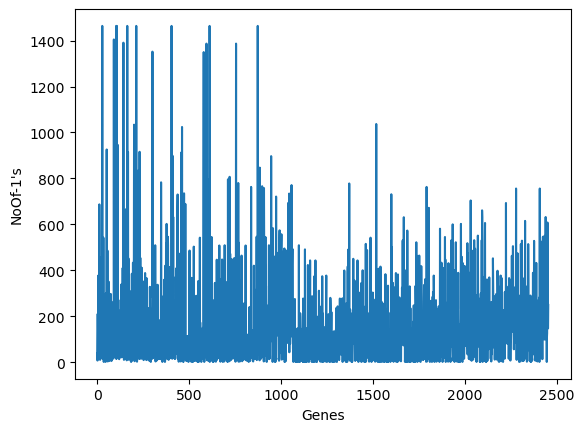

In [11]:
rows = list(range(2455))

plt.xlabel('Genes')
plt.ylabel('NoOf-1\'s')
plt.plot(rows, colSumNull.values())

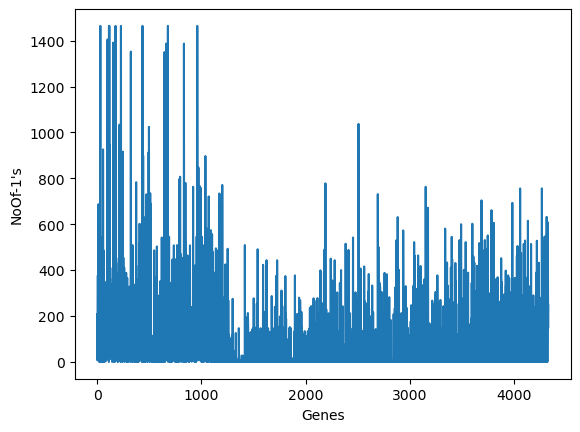

In [12]:
rows = list(range(4332))

plt.xlabel('Genes')
plt.ylabel('NoOf-1\'s')
plt.plot(rows, colSumNullAll.values())

### sort to see tha min and max no of -1

In [13]:
# sort the dataframe
sortNew = new.sort_values(by = 'TotalNoOf-1', axis = 1)
sortNew

,App-106,Hint1-73520984,Acot7-145,Hmgcs1-80517057,Stac-73788116,Map2k6-73817433,Cd63-73992715,LOC433258-73931636,Fam163b-73520970,Dvl2-112649476,...,Hars-554,Dbh-326,Erdr1-378,Pex14-1397,L1cam-620,Enc1-390,Adcy9-83,Mapk3-32576,Pcsk1n-777,Ankrd33-2006
TotalNoOf-1,1,1,1,1,1,1,1,1,1,1,...,1391,1405,1464,1464,1464,1464,1464,1464,1464,1464


### created a dictionary having all the simillar columns having equal number of -1's

In [14]:
# get all the values from the initial dictionary
ls = colSumNull.values()

# get the list of unique value of no.of -1
unique_list = pd.Series(ls).drop_duplicates().tolist()

# create a new dictionary to hold
# column names for each no.of -1's
simCols = {}

# loop through the unique list and gett all column names 
# from the dictionary and store it in the new dictionary
for num in unique_list:
    names = [k for k,v in colSumNull.items() if v == num]
    simCols[num] = names

In [15]:
# display an ordered dictionary
ordDic = OrderedDict(sorted(simCols.items()))
list(ordDic.items())[:4]

[(1,
  ['App-106',
   'Acot7-145',
   'Slc36a2-1069',
   'Plxnb2-1263',
   'Trpc4-1305',
   'Slc22a13-1663',
   'Gmfb-1726',
   'Siglece-1832',
   'Usp16-1886',
   'Wnt7a-1936',
   'Ldlrap1-2010',
   'Bmp7-2065',
   'Fem1a-2212',
   'Hoxb13-2299',
   'Slc35a3-2609',
   'Adamts16-276267',
   'Cnot7-321203',
   'Uqcrb-323595',
   'Cplx1-67752308',
   'Galns-70612726',
   'Prdx3-70743842',
   'Gstm4-70743872',
   'Ctnnbip1-70805935',
   'Resp18-71015810',
   'Ankrd6-71247671',
   'Glt8d2-71249079',
   'Nrsn1-71358557',
   'Sidt1-71587812',
   'Tox-71670691',
   'Pvr-71670694',
   'Rab3ip-71717136',
   'Id2-71836806',
   'Vstm2a-71836843',
   'Slc1a1-71836888',
   'Stk32a-71920510',
   'Mrap2-71924480',
   'Fut8-72007749',
   'Tpr-72104172',
   'Pde6g-72104173',
   'Mras-72119592',
   'Arhgap25-72128789',
   'Gstk1-72129245',
   'Agrp-72283799',
   'Fam189a1-72340182',
   '6330403A02Rik-72340183',
   'Sirpa-73512197',
   'Fam163b-73520970',
   'Hint1-73520984',
   'Strn-73521824',
   'B4ga

In [16]:
# 10 group of genes which has the max number of -1's
els = list(ordDic.items())
els[-10:]

[(946, ['Extl3-411']),
 (1024, ['Plxnb1-1561']),
 (1034, ['Nrtn-741']),
 (1037, ['C230081A13Rik-73931624']),
 (1350, ['Trip4-1924']),
 (1352, ['Vamp2-1092']),
 (1387, ['Snhg7-1968', 'Nfkbie-2425']),
 (1391, ['Hars-554']),
 (1405, ['Dbh-326']),
 (1464,
  ['Adcy9-83',
   'Erdr1-378',
   'Enc1-390',
   'L1cam-620',
   'Pcsk1n-777',
   'Pex14-1397',
   'Ankrd33-2006',
   'Mapk3-32576'])]

In [17]:
# # get a copy of the dataframe 
# dCor = dCorReduc
# # correlation of the data
# cormat = dCor.corr()
# # difficult to interpret the heat map
# sns.heatmap(cormat)

#### Function to get the significant p value of the features

In [18]:
#def r_pvalues(df):
#    cols = pd.DataFrame(columns=df.columns)
#    p = cols.transpose().join(cols, how='outer')
#    for r in df.columns:
#        for c in df.columns:
#            tmp = df[df[r].notnull() & df[c].notnull()]
#            p[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
#    return p

In [19]:
#pVal = r_pvalues(dCorReduc)
#pVal


### Remove all the genes that has at least 1 (-1) 

In [20]:
# get a copy of the data
dCorClean = dCorReduc.copy()

# drop the columns having -1's
# the dataframe new has all the columns having atleast 1 -1
dCorClean.drop(columns=new.columns,inplace=True)

### After cleaning the -1's we are left with the same 1465 voxels and 1877 genes as feature.

In [21]:
#dCorClean.to_csv('DenCorGeneExcNull.csv', index= False)

In [22]:
print("Total number of Rows::{}".format(len(dCorClean.index))) 
print("Total number of genes::{}".format(len(dCorClean.columns)))

Total number of Rows::1465
Total number of genes::1877


In [23]:
dCorClean.describe()

,Actc1-62,Adcy6-81,Atp5j-124,Atp6v1b2-129,Calm2-182,Car8-191,Cckar-203,Cd81-226,Acsbg1-369,Gnas-509,...,Esyt1-112202410,Mbp-112202838,Kdelr3-112203270,P2ry12-112203915,Sec61a2-112643861,Tmem175-112644308,Rest-112645169,Nr2f6-112645600,Grip2-112646245,Ap2b1-112648612
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,...,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,0.092022,0.001269,0.017069,0.084729,0.089517,0.044227,0.015504,0.081809,0.007447,0.094604,...,0.035111,0.126766,0.001277,0.010395,0.006514,0.006702,0.002847,0.001176,0.017691,0.016730
std,0.026972,0.001246,0.010747,0.024249,0.037691,0.014122,0.006985,0.022740,0.003514,0.030919,...,0.015067,0.022921,0.001654,0.005793,0.003075,0.003355,0.002788,0.001018,0.005758,0.007479
min,0.000197,0.000016,0.000214,0.003352,0.000241,0.002630,0.000797,0.000204,0.000173,0.000699,...,0.001977,0.005548,0.000037,0.001529,0.000077,0.000010,0.000154,0.000001,0.006357,0.001543
25%,0.084349,0.000579,0.009373,0.073674,0.069454,0.034280,0.009988,0.074820,0.005046,0.083260,...,0.025922,0.119191,0.000380,0.006720,0.004456,0.004558,0.000877,0.000574,0.013365,0.011146
50%,0.097079,0.000936,0.014941,0.090764,0.102215,0.044853,0.014613,0.083198,0.007212,0.100393,...,0.033249,0.128843,0.000855,0.008776,0.006224,0.006272,0.001926,0.000887,0.016873,0.015222
75%,0.108363,0.001514,0.022430,0.101202,0.117340,0.054655,0.020246,0.094757,0.009501,0.115626,...,0.042328,0.138751,0.001607,0.012042,0.008225,0.008224,0.003790,0.001448,0.021096,0.020670
max,0.151534,0.013266,0.071641,0.148675,0.149998,0.081813,0.039294,0.139800,0.022735,0.150961,...,0.101527,0.217410,0.032055,0.046407,0.032839,0.025476,0.016890,0.011751,0.037459,0.047279


In [24]:
#dCorClean['Actc1-62']
#plt.hist(dCorClean['Atp5j-124'])

### Normalize the data before applying PCA

In [25]:
# create a stanadard scaler object
sc = StandardScaler()
# copy the cleaned data 
dCorNorm = dCorClean.copy()

# Z- score Normalization
normData = sc.fit_transform(dCorNorm)  
# convert the normalized data to data frame
dCor = pd.DataFrame(normData, columns= sc.get_feature_names_out())

In [26]:
print("Shape of deNorm data:: {}".format(dCorNorm.shape))
print("Shape of norm ndArray:: {}".format(normData.shape))
dCor.head()


Shape of deNorm data:: (1465, 1877)
Shape of norm ndArray:: (1465, 1877)


,Actc1-62,Adcy6-81,Atp5j-124,Atp6v1b2-129,Calm2-182,Car8-191,Cckar-203,Cd81-226,Acsbg1-369,Gnas-509,...,Esyt1-112202410,Mbp-112202838,Kdelr3-112203270,P2ry12-112203915,Sec61a2-112643861,Tmem175-112644308,Rest-112645169,Nr2f6-112645600,Grip2-112646245,Ap2b1-112648612
0,0.112151,0.904383,-0.680653,-0.590942,0.310974,-1.981555,-0.895375,-0.062082,-0.055466,-0.398281,...,1.184647,-0.938451,-0.314090,-0.463026,-0.425668,-0.702961,-0.701510,-0.678285,0.667653,-0.390808
1,-1.088241,-0.998646,-1.525932,-3.357085,-2.359624,-2.746090,-2.106153,-1.503508,-2.045619,-2.556303,...,-2.081335,-2.576066,-0.521932,2.267156,-2.093925,-1.995617,-0.285608,-1.154490,0.205153,-1.630382
2,0.104553,2.409163,-0.372895,-0.208686,0.815749,-1.517606,-0.561501,-0.107969,0.066446,0.096091,...,0.588426,-0.600879,-0.087466,-0.656523,-0.107283,-0.259593,-0.797666,-0.606057,2.129953,0.253585
3,0.437081,1.684399,-0.158239,0.004874,1.015150,-1.249475,0.157551,-0.007328,0.520091,0.115706,...,1.030262,-0.540360,0.000430,-0.754711,-0.704278,-0.008132,-0.773475,-0.893541,2.488054,-0.411037
4,0.423601,-0.863369,0.215670,-1.641686,-2.058458,0.083324,-0.185165,0.833167,-0.553849,-0.122658,...,0.079726,1.071587,1.567837,0.297366,-1.513122,-1.746152,0.161739,-1.040657,0.968216,0.399210


### Apply PCA on the normalized data

In [27]:
# get a model for components explaining 95% of variance 
model = PCA(n_components = 0.95)

# fit transform the data
pca_PC = model.fit_transform(dCor)

# variance explained by components
variance = model.explained_variance_ratio_
cum_var = np.cumsum(variance)

In [29]:
# playing around using different pca package
#model1 = pca()
#m1_pc = model1.fit_transform(dCor)

#print(m1_pc['topfeat'])

In [ ]:
#m1_pc['outliers']

In [30]:
#model1.plot()
#plt.show()

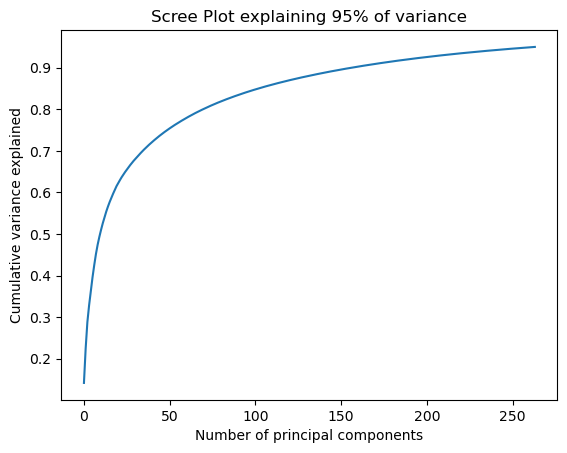

In [31]:
# Generate a scree plot
plt.title("Scree Plot explaining 95% of variance")
plt.plot(cum_var)
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative variance explained')
plt.show()

#### 95% of variance is explained by 264 PCs
#### 64% of variance is explained by 23 PCs
#### 61% of variance is explained by 19 PCs
#### 50% of variance is explained by 11 PCs

In [32]:
cum_var[:23]

array([0.14163188, 0.2245547 , 0.28800787, 0.3282222 , 0.36313854,
       0.39580715, 0.42508468, 0.45190451, 0.47438346, 0.4933097 ,
       0.51030103, 0.52608885, 0.54042617, 0.55379881, 0.56591556,
       0.57698345, 0.58726106, 0.59688505, 0.60624723, 0.61511028,
       0.62259784, 0.62973674, 0.63667752])

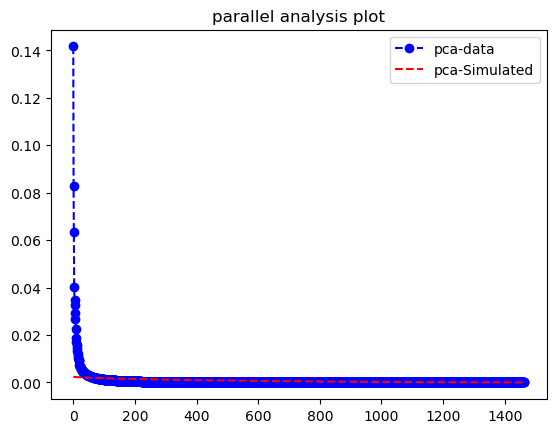

In [33]:
shapeMatrix = dCor.copy()

pca = PCA(shapeMatrix.shape[0]-1)
pca.fit(shapeMatrix)
transformedShapeMatrix = pca.transform(shapeMatrix)

random_eigenvalues = np.zeros(shapeMatrix.shape[0]-1)
for i in range(100):
    random_shapeMatrix = pd.DataFrame(np.random.normal(0, 1, [shapeMatrix.shape[0], shapeMatrix.shape[1]]))
    pca_random = PCA(shapeMatrix.shape[0]-1)
    pca_random.fit(random_shapeMatrix)
    transformedRandomShapeMatrix = pca_random.transform(random_shapeMatrix)
    random_eigenvalues = random_eigenvalues+pca_random.explained_variance_ratio_
random_eigenvalues = random_eigenvalues / 100


plt.plot(pca.explained_variance_ratio_, '--bo', label='pca-data')
plt.plot(random_eigenvalues, '--r', label='pca-Simulated')
plt.legend()
plt.title('parallel analysis plot')
plt.show()

In [34]:
# # get scree plot (for scree or elbow test)
# from bioinfokit.visuz import cluster

# pc_list = []
# for i in range(1,1465,1):
#     pc_list.append('PC'+str(i))
    
# cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_])
# # output saved to the same directory

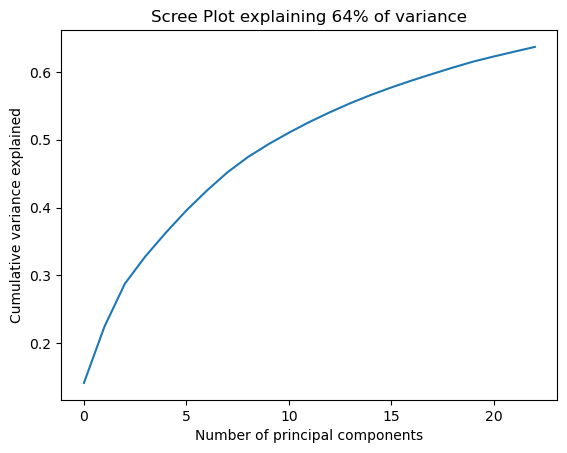

In [35]:
# plot 23 components
plt.title("Scree Plot explaining 64% of variance")
plt.plot(cum_var[:23])
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative variance explained')
plt.show()

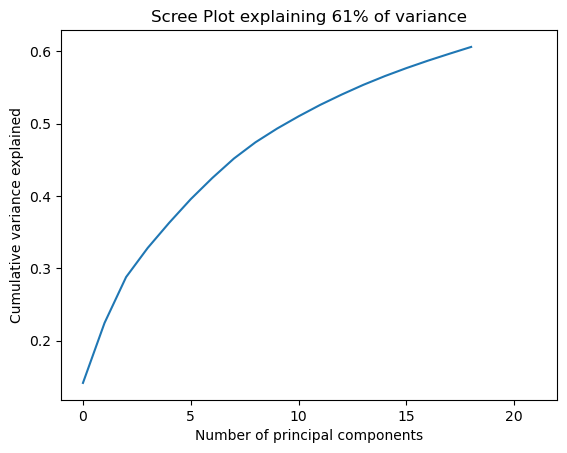

In [36]:
# plot 19 components
plt.title("Scree Plot explaining 61% of variance")
plt.xlim(-1,22)
plt.plot(cum_var[:19])
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative variance explained')
plt.show()

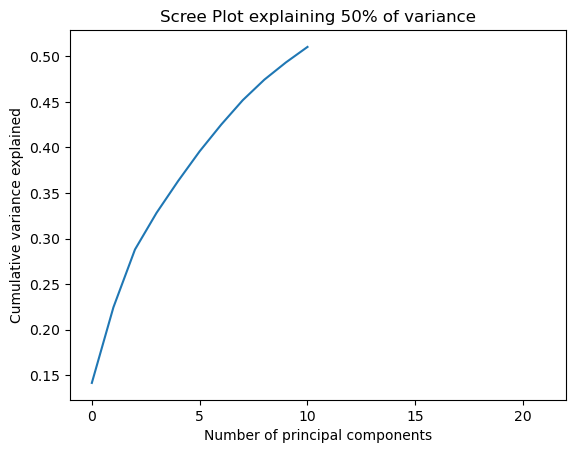

In [37]:
# plot 19 components
plt.title("Scree Plot explaining 50% of variance")
plt.xlim(-1,22)
plt.plot(cum_var[:11])
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative variance explained')
plt.show()

In [38]:
# import plotly.express as px
# fig = px.scatter(pca_PC, x=0, y=1)
# fig.show()

In [39]:
# fig = px.scatter_3d(
#     pca_PC, x=0, y=1, z=2, 
#     labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
# )
# fig.show()

In [40]:
# print(pca_PC.shape)
# print(model.components_.T.shape)

### Create a dataframe having components and feataurs with the loading values

In [41]:
col = []
for i in range(1,20,1):
    col.append('PC'+str(i))
    
loadings = pd.DataFrame(model.components_[:19].T, columns=col, index=dCor.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
Actc1-62,-0.016008,-0.056209,0.006118,-0.013804,0.039262,-0.007226,0.003614,0.019652,-0.000152,0.028031,0.001887,-0.016640,0.014637,-0.009146,-0.007326,-0.005583,0.050959,-0.031672,-0.008215
Adcy6-81,-0.009408,0.001015,0.025830,-0.028126,-0.008218,0.026695,0.000261,0.012774,0.039156,0.037477,-0.026427,-0.028543,0.012811,0.019663,-0.022214,-0.011807,0.023785,0.005231,0.006968
Atp5j-124,0.005358,-0.016553,0.036680,-0.013432,0.023853,0.013083,-0.054157,0.022830,0.019179,-0.014416,-0.022436,0.003832,-0.040671,-0.024901,-0.033533,0.001942,0.003515,-0.048027,0.025683
Atp6v1b2-129,-0.016598,-0.045039,0.010402,-0.024673,0.034094,-0.022386,-0.008608,-0.022625,-0.014551,0.029492,-0.017053,0.016348,-0.001964,-0.030194,0.012131,-0.030160,-0.006617,-0.004163,0.015504
Calm2-182,-0.010978,-0.046925,-0.004551,-0.007579,0.055048,-0.024273,-0.002641,-0.024587,-0.013534,0.016552,-0.036770,-0.011854,0.021398,-0.016840,0.013968,-0.024505,-0.002862,-0.031823,-0.014041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tmem175-112644308,-0.005154,-0.024652,0.016226,-0.016591,-0.001031,-0.000318,0.016811,0.008210,-0.020187,-0.007785,-0.001661,0.044478,0.065790,0.007818,0.015419,-0.022057,-0.025173,0.010353,0.029306
Rest-112645169,-0.020484,0.011158,-0.013335,0.024992,-0.010241,-0.006686,-0.028234,0.024342,0.025469,-0.004116,-0.018569,-0.003077,-0.075911,0.001081,0.009487,-0.004872,0.038288,-0.003627,-0.000447
Nr2f6-112645600,-0.009041,-0.004983,0.010856,-0.026786,0.015851,0.034260,0.007084,-0.002106,-0.019303,0.007601,0.009409,0.014358,0.019934,-0.003653,0.014104,-0.001988,-0.006307,0.038412,0.010709
Grip2-112646245,-0.034064,0.000659,-0.015264,-0.042918,-0.033946,-0.002261,0.009204,-0.018191,-0.027816,-0.003367,-0.041774,0.010877,0.012610,0.021123,0.009354,0.025475,0.002534,0.006218,0.010968


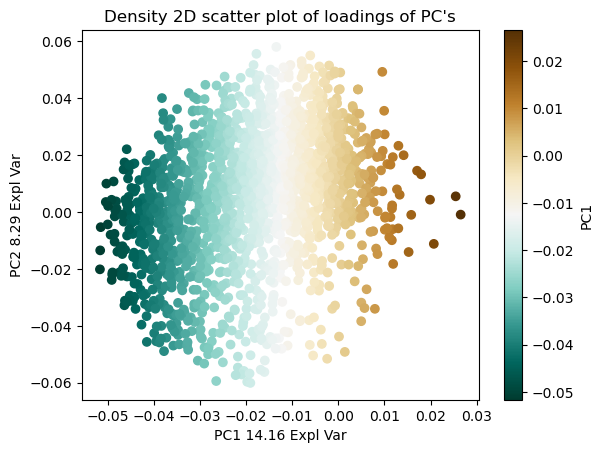

In [42]:
# 2D plot of PC's
x = loadings['PC1']
y = loadings['PC2']
fig = plt.figure()
plt.rcParams.update(plt.rcParamsDefault)
#plt.rcParams["figure.figsize"] = [6, 5]
#plt.rcParams["figure.autolayout"] = True
plt.scatter(x, y, c = x, cmap='BrBG_r')
plt.xlabel('PC1 ' + str(round(pca.explained_variance_ratio_[0]*100, 2)) + ' Expl Var')
plt.ylabel('PC2 ' + str(round(pca.explained_variance_ratio_[1]*100, 2)) + ' Expl Var')
plt.title("Density 2D scatter plot of loadings of PC's")
colbar = plt.colorbar()
colbar.set_label('PC1')
plt.show()

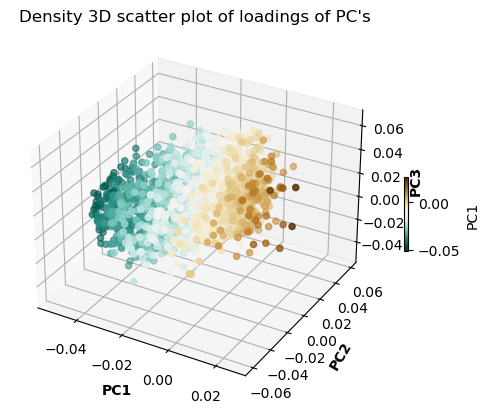

In [43]:
from matplotlib.colors import ListedColormap
# 3D plot of PC's

z = loadings['PC3']
fig = plt.figure()
plt.rcParams["figure.figsize"] = [7, 10]
plt.rcParams["figure.autolayout"] = True
ax = plt.axes(projection='3d')

#cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

plotDS = ax.scatter3D(x, y, z, c=x, cmap='BrBG_r') # c = x, cmap = cmap, alpha=1

plt.title("Density 3D scatter plot of loadings of PC's")

ax.set_xlabel('PC1', fontweight ='bold')
ax.set_ylabel('PC2', fontweight ='bold', rotation = 60)
ax.set_zlabel('PC3', fontweight ='bold', rotation = 90)
colbar = fig.colorbar(plotDS, ax = ax, shrink = 0.2, aspect = 20 )
colbar.set_label('PC1')

# show plot
plt.show()
#plt.rcParams.update(plt.rcParamsDefault)


In [44]:
plt.rcParams.update(plt.rcParamsDefault) # reset the plot parameters

In [45]:
#loadings['PC1'].sort_values('PC1')

# valPC1 = abs(round(loadings,2)).sort_values(by = 'PC1', ascending = False)['PC1']
# print(valPC1)
# sum(valPC1 > 0.02)

In [46]:
# valPC2 = abs(round(loadings,2)).sort_values(by = 'PC2', ascending = False)['PC2']
# print(valPC2)
# sum(valPC2 > 0.02)

In [47]:
# dataframe to hold no of genes remaining at different cutoff for each PC's
cutOffData = pd.DataFrame(columns=['0.01', '0.02', '0.03', '0.04', '0.05', '0.06'], index= loadings.columns)
cutoff = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06]


for col in loadings.columns:
    val = abs((loadings)).sort_values(by = col, ascending = False)[col]
    gCount = []
    for cut in cutoff:
        gCount.append(sum(val > cut))
    
    # Add the new row to the DataFrame
    cutOffData.loc[col] = gCount

print(cutOffData)    

      0.01 0.02 0.03 0.04 0.05 0.06
PC1   1304  798  438  151    5    0
PC2   1291  756  402  165   32    1
PC3   1255  748  375  159   51   13
PC4   1228  689  339  154   78   31
PC5   1220  685  347  165   71   26
PC6   1265  720  372  168   56   15
PC7   1230  694  363  184   61   12
PC8   1218  708  360  160   69   19
PC9   1252  738  351  132   58   22
PC10  1256  712  349  158   62   21
PC11  1225  703  363  161   71   19
PC12  1242  721  355  156   57   24
PC13  1212  673  343  160   69   30
PC14  1269  732  353  158   61   14
PC15  1242  733  384  147   58   19
PC16  1254  746  377  146   57   14
PC17  1191  670  333  165   70   31
PC18  1220  707  367  153   65   25
PC19  1223  693  373  149   64   23


In [48]:
cutOffData['0.05'] # cut off genes at 0.05

PC1      5
PC2     32
PC3     51
PC4     78
PC5     71
PC6     56
PC7     61
PC8     69
PC9     58
PC10    62
PC11    71
PC12    57
PC13    69
PC14    61
PC15    58
PC16    57
PC17    70
PC18    65
PC19    64
Name: 0.05, dtype: object

### Unique gene names in a dictionary for each PC at cutoff as input parameter

In [49]:
# get the gene names for each PC's at 0.05 cutoff
def geneAtCutOff(x):
    unqGn = {}
    cut = x
    for col in loadings.columns:
        val = abs((loadings))[col]
    
        unqGn[col] = loadings[abs((loadings))[col] > x][col].index.tolist()
    return unqGn

unqGn = geneAtCutOff(0.05)
unqGn['PC1'] # dictionary having all genes for each PCs at cutoff 0.05

['Atp6v1e1-655501',
 'Atp11b-70744324',
 'Vdac1-74957912',
 'Adcyap1r1-74988667',
 'Tagln3-75988633']

### unique no of genes for each PC not present in other PC's

In [50]:
# Function to get uqnique gene at a cutoff for PC's
def unqGeneAtCutOff(x):
    
    total = 0;
    for c in loadings.loc[:,:]:
    
        gene = loadings.loc[(abs(loadings[c])) > x].index
        #print("length of gene at {} is {}".format(c, len(gene)))

        for col in loadings.loc[:,:]:
            if col == c:
                continue
            cGene = loadings.loc[(abs(loadings[col])) > x].index
            gene = gene.difference(cGene)
            #print("length of difference gene at {} is {}".format(col, len(gene)))
            
        print('{} \t {}'.format(c,len(gene)))
        total = total + len(gene)
    
    print("Total unique Gene::: {}".format(total))
        
unqGeneAtCutOff(0.05)

PC1 	 5
PC2 	 25
PC3 	 41
PC4 	 54
PC5 	 38
PC6 	 35
PC7 	 26
PC8 	 49
PC9 	 36
PC10 	 43
PC11 	 40
PC12 	 41
PC13 	 46
PC14 	 30
PC15 	 37
PC16 	 29
PC17 	 39
PC18 	 33
PC19 	 39
Total unique Gene::: 686


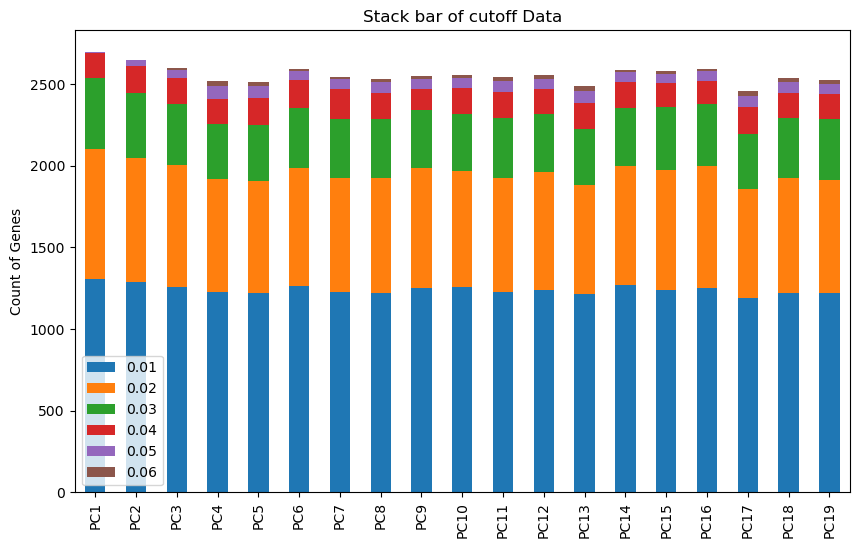

In [51]:
cutOffData.plot(kind = 'bar' , stacked = True, figsize = (10,6))
plt.title('Stack bar of cutoff Data')
plt.ylabel('Count of Genes')
plt.show()

### Important feature based on loadings

In [52]:
# for col in loadings.columns:
#     tp10 = abs(loadings[col]).nlargest(10).index

#     print(loadings.loc[tp10, col])

In [53]:
# create a dataframe to have the important features
impFetPC_df = pd.DataFrame(columns=['PC', 'ImpFeature', 'Loading',])

# loop through the columns to create a dataframe of important features
for col in loadings.columns:
    # get the feature name having max impact
    fet = abs(loadings[col]).idxmax()
    # get the loadings value
    load = loadings.loc[fet, col]
    
    # create the datafame
    df = pd.DataFrame({'PC': [col],
                        'ImpFeature': [fet],
                        'Loading': [load]})
    
    # concat the data to the dataframe
    impFetPC_df = pd.concat([impFetPC_df, df], ignore_index=True)
                            
print(impFetPC_df)

      PC         ImpFeature   Loading
0    PC1    Tagln3-75988633 -0.051660
1    PC2   Atp6v0c-74881559 -0.060053
2    PC3      Mcam-71836841  0.064753
3    PC4      Asb8-77414921 -0.078782
4    PC5       Wls-72077452  0.069437
5    PC6     Tnni1-75774109 -0.076074
6    PC7     Pvrl1-74363351  0.075392
7    PC8      Sv2b-72104171  0.076908
8    PC9  Arhgap33-74583174 -0.088150
9   PC10    Avpr1a-74641316  0.086396
10  PC11         Hpd-356492  0.088377
11  PC12    Schip1-72077455 -0.082469
12  PC13    Arrdc3-77280426  0.096996
13  PC14     Fstl5-72283812  0.076424
14  PC15     Apba1-74658000 -0.074395
15  PC16   Slc2a13-74958626 -0.081473
16  PC17  Cacna2d1-72119649  0.096443
17  PC18   Cacna1g-71587822  0.099093
18  PC19     C1ql2-71587929  0.088392


### Top 10 important features for PC's

In [54]:
# create a dataframe to have the important features
tp10ImpFetPC_df = pd.DataFrame(columns=['PC', 'Top10ImpFeature'])

# loop through the columns to create a dataframe of important features
for col in loadings.columns:
    # get the feature name having max impact
    fet = (abs(loadings[col]).nlargest(10).index).to_list()
    # get the loadings value
    #load = loadings.loc[fet, col]
    
    # create the datafame
    df = pd.DataFrame({'PC': [col],
                        'Top10ImpFeature': [fet]})
                        #'Loading': [load]})
    
    # concat the data to the dataframe
    tp10ImpFetPC_df = pd.concat([tp10ImpFetPC_df, df], ignore_index=True)
                            
tp10ImpFetPC_df

,PC,Top10ImpFeature
0,PC1,"[Tagln3-75988633, Adcyap1r1-74988667, Atp6v1e1..."
1,PC2,"[Atp6v0c-74881559, Atp2a2-74881549, Gnas-509, ..."
2,PC3,"[Mcam-71836841, Tmtc1-73636154, Ppp1r17-738179..."
3,PC4,"[Asb8-77414921, Chrnd-74988680, Sned1-74958587..."
4,PC5,"[Wls-72077452, Id3-74724763, Sulf1-75041501, T..."
5,PC6,"[Tnni1-75774109, Cdc42ep1-70814345, Mterfd3-70..."
6,PC7,"[Pvrl1-74363351, Loxl2-71670486, Pou6f2-712490..."
7,PC8,"[Sv2b-72104171, Rims3-74512027, Mapk8-71063715..."
8,PC9,"[Arhgap33-74583174, Eya2-70743234, Ramp3-1818,..."
9,PC10,"[Avpr1a-74641316, Cntnap4-70928361, Glipr1-745..."


### Write top 10 Features for each PCs based on loading to a csv file

In [55]:
tp10ImpFetPC_df.to_csv('Top10ImpFetForPCs.csv', index=False)

In [56]:
# # get PCA loadings plots (2D)
# # 2D 
# cluster.pcaplot(x=loadings['PC1'], y=loadings['PC2'],labels=dCor.columns, 
#     var1=round(pca.explained_variance_ratio_[0]*100, 2),
#     var2=round(pca.explained_variance_ratio_[1]*100, 2))


In [57]:
# # heat map of loadings for 19 PC's
# ax = sns.heatmap(loadings, cmap='Spectral')
# plt.title('Heat Map of Loadings for 19 PC\'s')
# plt.show()

In [58]:
# loadings.boxplot(rot=45)
# plt.show()

In [59]:
#loadings

### Unique No of Genes at different cutoff levels

In [60]:

gene02 = loadings.loc[(abs(loadings['PC1'])) > 0.02].index
gene03 = loadings.loc[(abs(loadings['PC1'])) > 0.03].index
gene04 = loadings.loc[(abs(loadings['PC1'])) > 0.04].index
gene05 = loadings.loc[(abs(loadings['PC1'])) > 0.05].index
gene06 = loadings.loc[(abs(loadings['PC1'])) > 0.06].index

for col in loadings.columns[1:]:
    
    gen2 = loadings.loc[(abs(loadings[col])) > 0.02].index
    gen3 = loadings.loc[(abs(loadings[col])) > 0.03].index
    gen4 = loadings.loc[(abs(loadings[col])) > 0.04].index
    gen5 = loadings.loc[(abs(loadings[col])) > 0.05].index
    gen6 = loadings.loc[(abs(loadings[col])) > 0.06].index
    
    # print("{} Before union:::{}".format(col,len(gene05)))
    # print("Length of gene for {} is {}".format(col, len(gen5)))
    gene02 = gene02.union(gen2)
    gene03 = gene03.union(gen3)
    gene04 = gene04.union(gen4)
    gene05 = gene05.union(gen5)
    gene06 = gene06.union(gen6)
    # print("{} After union:::{}".format(col,len(gene05)))
     
print('Unique No of Genes at cutoff 0.02 for all PC\'s::{}'.format(len(gene02)))
print('Unique No of Genes at cutoff 0.03 for all PC\'s::{}'.format(len(gene03)))
print('Unique No of Genes at cutoff 0.04 for all PC\'s::{}'.format(len(gene04)))
print('Unique No of Genes at cutoff 0.05 for all PC\'s::{}'.format(len(gene05)))
print('Unique No of Genes at cutoff 0.06 for all PC\'s::{}'.format(len(gene06)))
      

Unique No of Genes at cutoff 0.02 for all PC's::1873
Unique No of Genes at cutoff 0.03 for all PC's::1836
Unique No of Genes at cutoff 0.04 for all PC's::1597
Unique No of Genes at cutoff 0.05 for all PC's::886
Unique No of Genes at cutoff 0.06 for all PC's::339


In [61]:
# with open('DCorUniqueGenesCutoff0.04.txt', 'w') as file:
#     # Iterate through the list and write each element to the file
#     for item in gene04:
#         file.write(str(item) + '\n')

In [62]:
print(abs(round(loadings,5)).max().max())
print(abs(round(loadings,5)).min().min())

0.09909
0.0


In [63]:
gene05 # gene names at 0.05 cutoff

Index(['0610007P14Rik-70927828', '1110008P14Rik-71015816',
       '1700019N12Rik-73718050', '1700054N08Rik-70743908',
       '1810041L15Rik-72340125', '2310003H01Rik-72080185',
       '2810405K02Rik-74047901', '3632451O06Rik-70928306',
       '4833414E09Rik-73521828', '4833424O15Rik-70744326',
       ...
       'Zfp189-77414121', 'Zfp191-1894', 'Zfp260-75080996', 'Zfp536-71836801',
       'Zfp57-72103842', 'Zfp618-71670712', 'Zfp804a-73817426',
       'Zfp810-356856', 'Zim1-71670692', 'Zmat4-71249750'],
      dtype='object', length=886)

### Create the dataframe with cutoff genes 

In [64]:
# Function to get a dataFrame at a cutoff 
# input is names of Gene object ex: gene05, gene06 from above computation
def dataFrameAtCutOff(gn):
    cutOffGene = dCorReduc.copy()
    cutOffGene = cutOffGene[gn]
    cutOffGene['Structure-ID'] = denCoral['Structure-ID']
    return cutOffGene

cutOffGene = dataFrameAtCutOff(gene05) # create a dataframe using genenames at cutoff 0.05
cutOffGene

,0610007P14Rik-70927828,1110008P14Rik-71015816,1700019N12Rik-73718050,1700054N08Rik-70743908,1810041L15Rik-72340125,2310003H01Rik-72080185,2810405K02Rik-74047901,3632451O06Rik-70928306,4833414E09Rik-73521828,4833424O15Rik-70744326,...,Zfp191-1894,Zfp260-75080996,Zfp536-71836801,Zfp57-72103842,Zfp618-71670712,Zfp804a-73817426,Zfp810-356856,Zim1-71670692,Zmat4-71249750,Structure-ID
0,0.021348,0.057008,0.000004,0.000839,0.001469,0.000228,0.008911,0.045154,0.002050,0.000985,...,0.001020,0.008240,0.032769,0.021453,0.000107,0.014056,0.038644,0.003047,0.005929,852
1,0.001065,0.011956,0.000661,0.000431,0.000776,0.024536,0.006416,0.032885,0.000120,0.003469,...,0.000395,0.004545,0.027580,0.000035,0.000349,0.001012,0.000201,0.000488,0.000362,136
2,0.033161,0.061500,0.000016,0.000528,0.002479,0.000632,0.011172,0.040065,0.004024,0.001297,...,0.001536,0.006836,0.025396,0.019810,0.000134,0.013563,0.045790,0.008221,0.003419,852
3,0.031919,0.059916,0.000014,0.000441,0.003898,0.001513,0.015252,0.039624,0.005156,0.001755,...,0.001865,0.006898,0.026683,0.014416,0.000090,0.015443,0.049720,0.009815,0.003084,852
4,0.003088,0.043159,0.010124,0.004789,0.000939,0.005708,0.008895,0.067295,0.000828,0.001102,...,0.003204,0.015502,0.025987,0.000302,0.000131,0.007006,0.002375,0.005555,0.015790,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,0.023527,0.054222,0.000188,0.001336,0.001050,0.005314,0.012566,0.042638,0.001300,0.004254,...,0.000602,0.005676,0.045550,0.008952,0.000572,0.010863,0.032383,0.009965,0.008636,852
1461,0.019297,0.060722,0.000266,0.000956,0.001475,0.003621,0.014636,0.043726,0.001376,0.003119,...,0.000581,0.006046,0.050738,0.005996,0.000760,0.014712,0.030075,0.006833,0.008062,852
1462,0.001481,0.060279,0.001373,0.008533,0.000067,0.007202,0.010445,0.053501,0.000416,0.001496,...,0.001961,0.010022,0.016879,0.002741,0.000172,0.001347,0.016005,0.001001,0.012038,136
1463,0.016543,0.053313,0.000575,0.002448,0.001593,0.004593,0.010952,0.047608,0.001069,0.003762,...,0.000378,0.007895,0.044113,0.006119,0.000427,0.012263,0.027773,0.003143,0.009612,852


In [65]:
# expPerc = []
# genes = []
# yo = cutOffGene.iloc[0]
# t = yo.keys()
# i = 0
# for val in yo:
#   if (val != 0):
#     genes.append(t[i])
#   i += 1
# print(len(genes))

In [66]:
# expPerc = []
# for ind in cutOffGene.index:
#     genes = []
#     yo = cutOffGene.iloc[ind]
#     t = yo.keys()
#     i = 0
#     for val in yo:
#       if (val != 0):
#         genes.append(t[i])
#       i += 1
#     expPerc.append((len(genes)-1)/886)

In [67]:
# cutOffGene['expressive'] = expPerc

In [68]:
# cutOffGene.head()

### Mean of Gene Density grouped by structure ID

In [107]:
mean_df = cutOffGene.groupby('Structure-ID').mean()
mean_df

,0610007P14Rik-70927828,1110008P14Rik-71015816,1700019N12Rik-73718050,1700054N08Rik-70743908,1810041L15Rik-72340125,2310003H01Rik-72080185,2810405K02Rik-74047901,3632451O06Rik-70928306,4833414E09Rik-73521828,4833424O15Rik-70744326,...,Zfp189-77414121,Zfp191-1894,Zfp260-75080996,Zfp536-71836801,Zfp57-72103842,Zfp618-71670712,Zfp804a-73817426,Zfp810-356856,Zim1-71670692,Zmat4-71249750
Structure-ID,,,,,,,,,,,,,,,,,,,,,
136,0.012678,0.044041,0.000764,0.001454,0.002275,0.006418,0.014054,0.031472,0.001369,0.004782,...,0.000100,0.002830,0.004886,0.034055,0.004363,0.001133,0.004388,0.024122,0.005554,0.004655
143,0.011943,0.046038,0.000937,0.005261,0.002267,0.007263,0.018071,0.037134,0.001535,0.004840,...,0.001109,0.012398,0.005304,0.034212,0.003729,0.001050,0.011695,0.032512,0.008900,0.003848
235,0.020935,0.107329,0.000422,0.001211,0.000856,0.001721,0.049537,0.036142,0.000950,0.002593,...,0.000018,0.002388,0.003605,0.072435,0.002755,0.002913,0.007839,0.014138,0.010060,0.023649
307,0.009893,0.042395,0.000612,0.001960,0.003130,0.011355,0.017958,0.042992,0.002276,0.010516,...,0.000394,0.007245,0.006550,0.026975,0.008205,0.001803,0.009043,0.039156,0.008654,0.001732
661,0.009461,0.055289,0.000250,0.001405,0.001190,0.008316,0.016003,0.044609,0.002777,0.004560,...,0.000119,0.004745,0.010177,0.024864,0.005286,0.000510,0.018569,0.027274,0.003705,0.000536
773,0.008715,0.037303,0.000487,0.003199,0.003657,0.019495,0.049046,0.059502,0.002761,0.002088,...,0.000167,0.002677,0.007099,0.038411,0.007144,0.000900,0.003510,0.010988,0.003252,0.002873
852,0.015319,0.042549,0.000435,0.001777,0.002169,0.005888,0.019755,0.036901,0.001616,0.005699,...,0.000121,0.002562,0.005574,0.034719,0.007538,0.001289,0.007551,0.028282,0.006807,0.005148
939,0.015924,0.050622,0.000650,0.001937,0.000786,0.011802,0.013168,0.034825,0.003120,0.006208,...,0.000171,0.012970,0.005828,0.037416,0.003123,0.002246,0.009331,0.030337,0.010537,0.003293
970,0.006098,0.030225,0.000242,0.001846,0.007143,0.009933,0.024642,0.037058,0.001469,0.005073,...,0.000089,0.003168,0.007604,0.049775,0.006523,0.001399,0.005281,0.016306,0.003373,0.002274


In [70]:
#cutOffGene.groupby('Structure-ID').sum()

In [71]:
cutOffGene.groupby('Structure-ID')['Structure-ID'].value_counts()

Structure-ID
136     351
143       7
235       1
307      90
661      98
773      48
852     196
939       6
970      30
978     115
1048    340
1098     57
1107    126
Name: count, dtype: int64

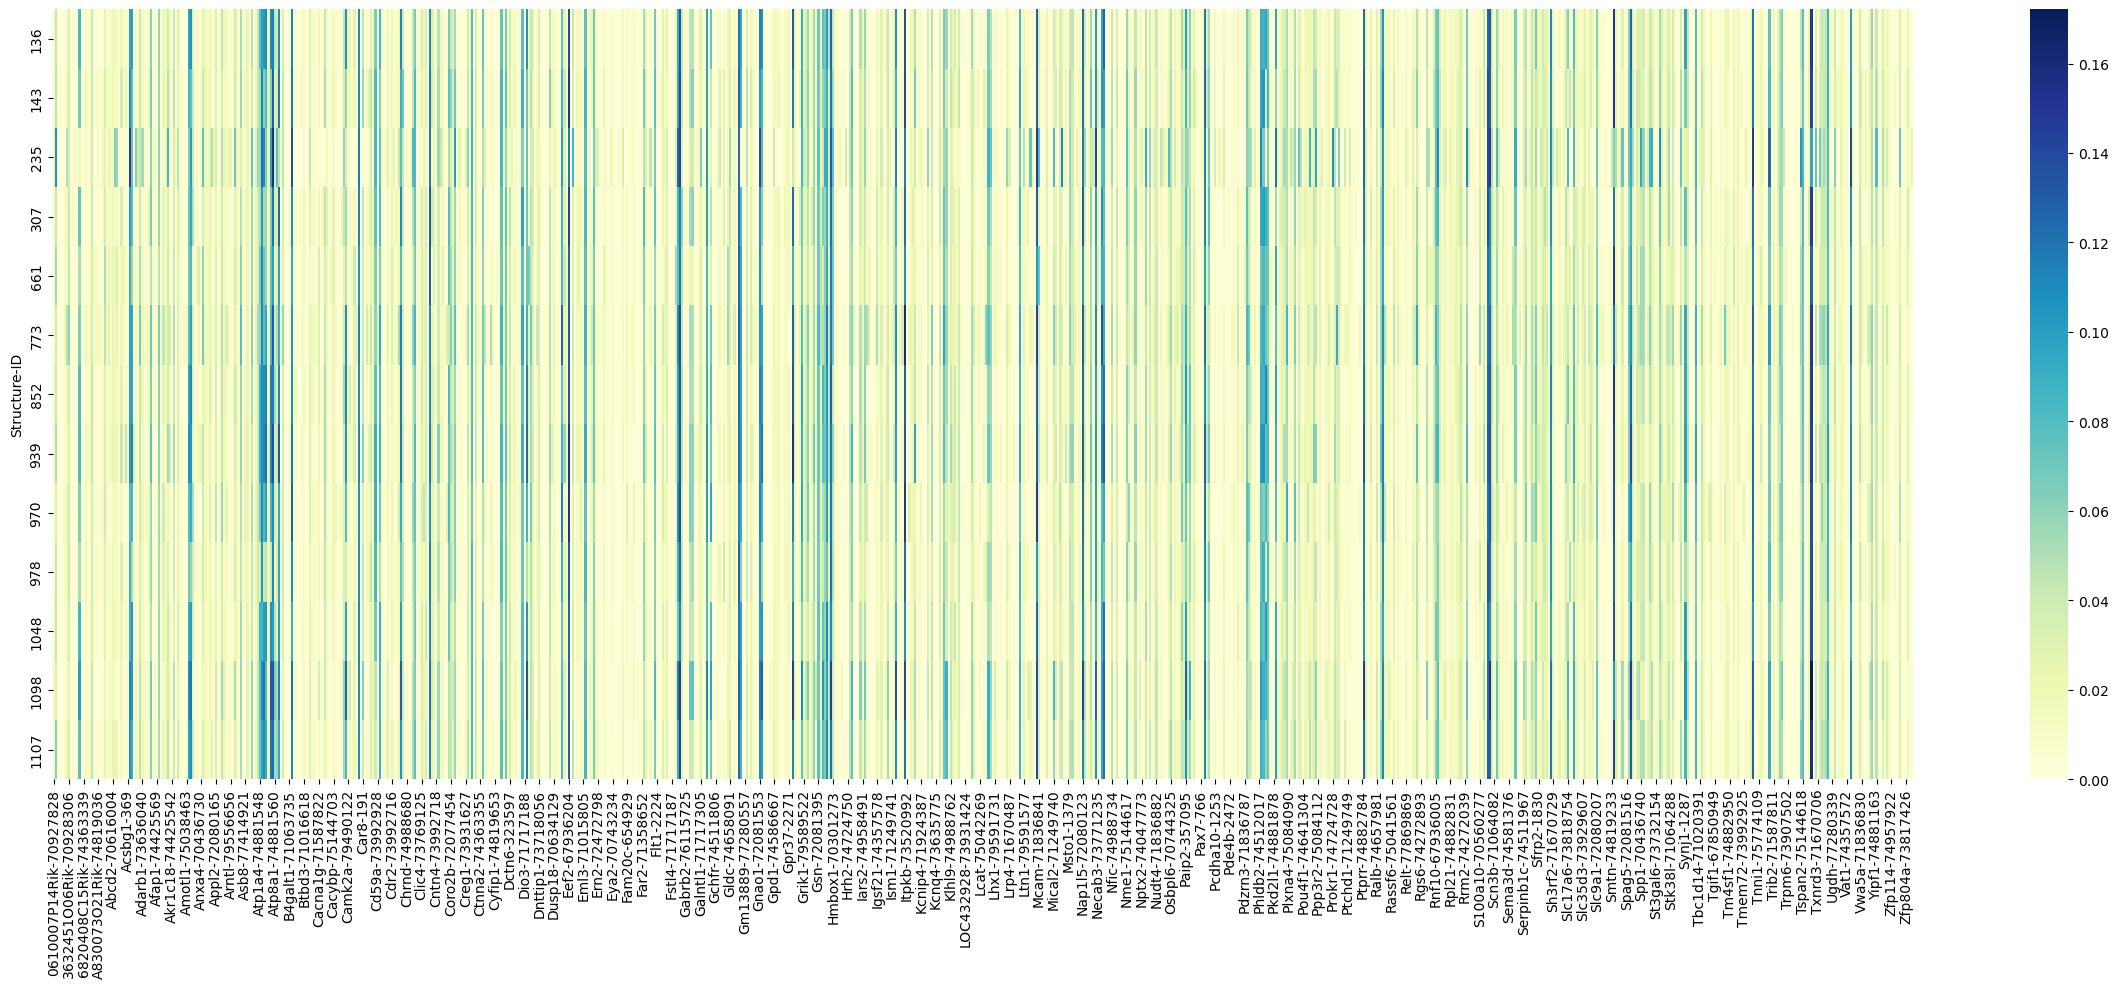

In [72]:
plt.subplots(figsize=(30,10))
# Create a custom colormap
custom_cmap = sns.color_palette("YlGnBu", as_cmap=True) #YlOrBr

# Sort the DataFrame based on desired order
sorted_df = cutOffGene.groupby('Structure-ID').mean() #.sort_values(by= cutOffGene.all())

# mean of the density for each gene with a heat map
sns.heatmap(sorted_df, cmap=custom_cmap)
plt.show()

In [73]:
# plt.subplots(figsize=(30,10))
# # Create a custom colormap
# custom_cmap = sns.color_palette("YlOrBr", as_cmap=True) #YlOrBr

# # sum of the density for each gene with a heat map
# sns.heatmap(cutOffGene.groupby('Structure-ID').sum(), cmap=custom_cmap)
# plt.show()

In [74]:
# plt.subplots(figsize=(30,10))
# # Create a custom colormap
# custom_cmap = sns.color_palette("YlOrBr", as_cmap=True) #YlOrBr

# # median of the density for each gene with a heat map
# sns.heatmap(cutOffGene.groupby('Structure-ID').median(), cmap=custom_cmap)
# #plt.title('HeatMap Of Median of density for each gene across Structure ID')
# plt.show()

### Most influential gene for each structure ID based on mean density value

In [75]:
cutOffGene.groupby('Structure-ID').mean().idxmax(axis = 1)

Structure-ID
136          Snap25-1854
143        Eef2-67936204
235      Atp6v1e1-655501
307      Tubb2a-74819689
661          Snap25-1854
773       Itm2c-67936207
852          Snap25-1854
939     Gprasp1-70743888
970        Eef2-67936204
978      Tubb2a-74819689
1048     Tubb2a-74819689
1098     Tubb2a-74819689
1107     Tubb2a-74819689
dtype: object

In [76]:
top5InfGene = round(cutOffGene.groupby('Structure-ID').mean(), 3).apply(lambda x: x.nlargest(5), axis=1)
top5InfGene

,Acsl6-71836810,Atp6v1e1-655501,Cnp-77371841,Eef2-67936204,Gabarapl1-654925,Glul-74047918,Gprasp1-70743888,Itm2c-67936207,Mbp-112202838,Nefl-73512198,Pvr-79556654,Scd2-74819250,Scg5-75773511,Snap25-1854,Sparcl1-74750016,Tmx2-71836805,Tubb2a-74819689
Structure-ID,,,,,,,,,,,,,,,,,
136,NaN,NaN,NaN,0.138,0.135,NaN,NaN,0.137,NaN,NaN,NaN,NaN,NaN,0.151,NaN,NaN,0.150
143,NaN,NaN,NaN,0.153,0.141,NaN,NaN,0.139,NaN,NaN,NaN,NaN,NaN,0.149,NaN,NaN,0.142
235,0.147,0.156,NaN,NaN,NaN,NaN,NaN,NaN,0.151,NaN,NaN,NaN,0.148,NaN,NaN,0.149,NaN
307,NaN,NaN,0.130,0.143,NaN,NaN,NaN,NaN,0.132,NaN,NaN,0.136,NaN,NaN,NaN,NaN,0.147
661,NaN,NaN,0.129,0.127,NaN,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146,NaN,NaN,0.126
773,NaN,NaN,NaN,NaN,0.139,NaN,NaN,0.160,0.143,0.136,NaN,NaN,NaN,NaN,NaN,NaN,0.150
852,NaN,NaN,NaN,0.133,0.133,NaN,0.137,NaN,NaN,NaN,NaN,NaN,NaN,0.154,NaN,NaN,0.148
939,NaN,NaN,NaN,0.152,NaN,NaN,0.155,NaN,NaN,NaN,NaN,NaN,NaN,0.141,0.140,NaN,0.147
970,NaN,NaN,NaN,0.153,0.139,NaN,NaN,0.151,0.148,NaN,NaN,NaN,NaN,0.137,NaN,NaN,NaN


In [77]:
#top5InfGene.to_csv('Top5InfGene.csv', index=True)

### Repeat the analysis at cutoff 0.04

In [78]:
cutOffData['0.04'] # genes for each PC's at cutoff 0.04

PC1     151
PC2     165
PC3     159
PC4     154
PC5     165
PC6     168
PC7     184
PC8     160
PC9     132
PC10    158
PC11    161
PC12    156
PC13    160
PC14    158
PC15    147
PC16    146
PC17    165
PC18    153
PC19    149
Name: 0.04, dtype: object

In [79]:
unqGeneAtCutOff(0.04) # Unique genes pesent in 1 PC not present in other PC 

PC1 	 98
PC2 	 69
PC3 	 45
PC4 	 34
PC5 	 35
PC6 	 25
PC7 	 32
PC8 	 41
PC9 	 23
PC10 	 30
PC11 	 28
PC12 	 24
PC13 	 28
PC14 	 22
PC15 	 29
PC16 	 24
PC17 	 34
PC18 	 15
PC19 	 26
Total unique Gene::: 662


In [80]:
# create the dataframe at cutoff of 0.04 having structure id from Original data
cutOffGene04 = dataFrameAtCutOff(gene04)
cutOffGene04

,0610007P14Rik-70927828,1110002B05Rik-72081396,1110008P14Rik-71015816,1700019N12Rik-73718050,1700054N08Rik-70743908,1810041L15Rik-72340125,2010106G01Rik-1647,2310003H01Rik-72080185,2610018G03Rik-74047829,2810405K02Rik-74047901,...,Zfp618-71670712,Zfp804a-73817426,Zfp810-356856,Zfyve9-73521827,Zim1-71670692,Zkscan16-74750043,Zmat4-71249750,Zmynd11-70743906,Zyx-71670710,Structure-ID
0,0.021348,0.001483,0.057008,0.000004,0.000839,0.001469,0.000737,0.000228,0.000051,0.008911,...,0.000107,0.014056,0.038644,0.024707,0.003047,0.001561,0.005929,0.055498,0.035380,852
1,0.001065,0.000689,0.011956,0.000661,0.000431,0.000776,0.003727,0.024536,0.000181,0.006416,...,0.000349,0.001012,0.000201,0.005073,0.000488,0.000074,0.000362,0.008111,0.004737,136
2,0.033161,0.001233,0.061500,0.000016,0.000528,0.002479,0.000703,0.000632,0.000397,0.011172,...,0.000134,0.013563,0.045790,0.029823,0.008221,0.003815,0.003419,0.046087,0.019398,852
3,0.031919,0.001379,0.059916,0.000014,0.000441,0.003898,0.000581,0.001513,0.000265,0.015252,...,0.000090,0.015443,0.049720,0.026032,0.009815,0.002019,0.003084,0.043424,0.016822,852
4,0.003088,0.000268,0.043159,0.010124,0.004789,0.000939,0.004994,0.005708,0.000063,0.008895,...,0.000131,0.007006,0.002375,0.016618,0.005555,0.004038,0.015790,0.060134,0.036073,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,0.023527,0.000405,0.054222,0.000188,0.001336,0.001050,0.001087,0.005314,0.000980,0.012566,...,0.000572,0.010863,0.032383,0.019444,0.009965,0.002998,0.008636,0.051445,0.016110,852
1461,0.019297,0.000998,0.060722,0.000266,0.000956,0.001475,0.001268,0.003621,0.001670,0.014636,...,0.000760,0.014712,0.030075,0.021380,0.006833,0.001747,0.008062,0.047875,0.016170,852
1462,0.001481,0.001075,0.060279,0.001373,0.008533,0.000067,0.000694,0.007202,0.000019,0.010445,...,0.000172,0.001347,0.016005,0.008491,0.001001,0.001229,0.012038,0.058260,0.012564,136
1463,0.016543,0.000458,0.053313,0.000575,0.002448,0.001593,0.001751,0.004593,0.000468,0.010952,...,0.000427,0.012263,0.027773,0.031015,0.003143,0.001234,0.009612,0.052392,0.025846,852


In [81]:
# mean Density Grouped by Structure ID
cutOffGene04.groupby('Structure-ID').mean()

,0610007P14Rik-70927828,1110002B05Rik-72081396,1110008P14Rik-71015816,1700019N12Rik-73718050,1700054N08Rik-70743908,1810041L15Rik-72340125,2010106G01Rik-1647,2310003H01Rik-72080185,2610018G03Rik-74047829,2810405K02Rik-74047901,...,Zfp57-72103842,Zfp618-71670712,Zfp804a-73817426,Zfp810-356856,Zfyve9-73521827,Zim1-71670692,Zkscan16-74750043,Zmat4-71249750,Zmynd11-70743906,Zyx-71670710
Structure-ID,,,,,,,,,,,,,,,,,,,,,
136,0.012678,0.001456,0.044041,0.000764,0.001454,0.002275,0.001605,0.006418,0.000712,0.014054,...,0.004363,0.001133,0.004388,0.024122,0.028340,0.005554,0.008537,0.004655,0.053312,0.021208
143,0.011943,0.003327,0.046038,0.000937,0.005261,0.002267,0.000650,0.007263,0.000281,0.018071,...,0.003729,0.001050,0.011695,0.032512,0.014864,0.008900,0.008857,0.003848,0.056486,0.019188
235,0.020935,0.005565,0.107329,0.000422,0.001211,0.000856,0.000984,0.001721,0.011516,0.049537,...,0.002755,0.002913,0.007839,0.014138,0.052466,0.010060,0.001588,0.023649,0.038974,0.047518
307,0.009893,0.001346,0.042395,0.000612,0.001960,0.003130,0.001734,0.011355,0.002077,0.017958,...,0.008205,0.001803,0.009043,0.039156,0.015908,0.008654,0.008444,0.001732,0.048349,0.013518
661,0.009461,0.001929,0.055289,0.000250,0.001405,0.001190,0.002764,0.008316,0.006083,0.016003,...,0.005286,0.000510,0.018569,0.027274,0.023189,0.003705,0.002562,0.000536,0.043097,0.029910
773,0.008715,0.006276,0.037303,0.000487,0.003199,0.003657,0.001816,0.019495,0.002379,0.049046,...,0.007144,0.000900,0.003510,0.010988,0.029365,0.003252,0.007800,0.002873,0.051979,0.030080
852,0.015319,0.002559,0.042549,0.000435,0.001777,0.002169,0.001341,0.005888,0.000986,0.019755,...,0.007538,0.001289,0.007551,0.028282,0.026697,0.006807,0.014112,0.005148,0.056002,0.016770
939,0.015924,0.003172,0.050622,0.000650,0.001937,0.000786,0.000750,0.011802,0.000509,0.013168,...,0.003123,0.002246,0.009331,0.030337,0.021271,0.010537,0.008264,0.003293,0.052606,0.016597
970,0.006098,0.003587,0.030225,0.000242,0.001846,0.007143,0.000938,0.009933,0.000148,0.024642,...,0.006523,0.001399,0.005281,0.016306,0.021349,0.003373,0.014682,0.002274,0.049616,0.014865


In [82]:
cutOffGene04.groupby('Structure-ID')['Structure-ID'].value_counts()

Structure-ID
136     351
143       7
235       1
307      90
661      98
773      48
852     196
939       6
970      30
978     115
1048    340
1098     57
1107    126
Name: count, dtype: int64

In [83]:
# Most influential gene at cutoff 0.04 based on mean density value
cutOffGene04.groupby('Structure-ID').mean().idxmax(axis = 1)

Structure-ID
136     8030498B09Rik-74958606
143             Uchl1-79556674
235            Tmsb10-73521810
307               App-79591705
661                Snap25-1854
773     8030498B09Rik-74958606
852               App-79591705
939     8030498B09Rik-74958606
970     8030498B09Rik-74958606
978             Uchl1-79556674
1048              App-79591705
1098    8030498B09Rik-74958606
1107    8030498B09Rik-74958606
dtype: object

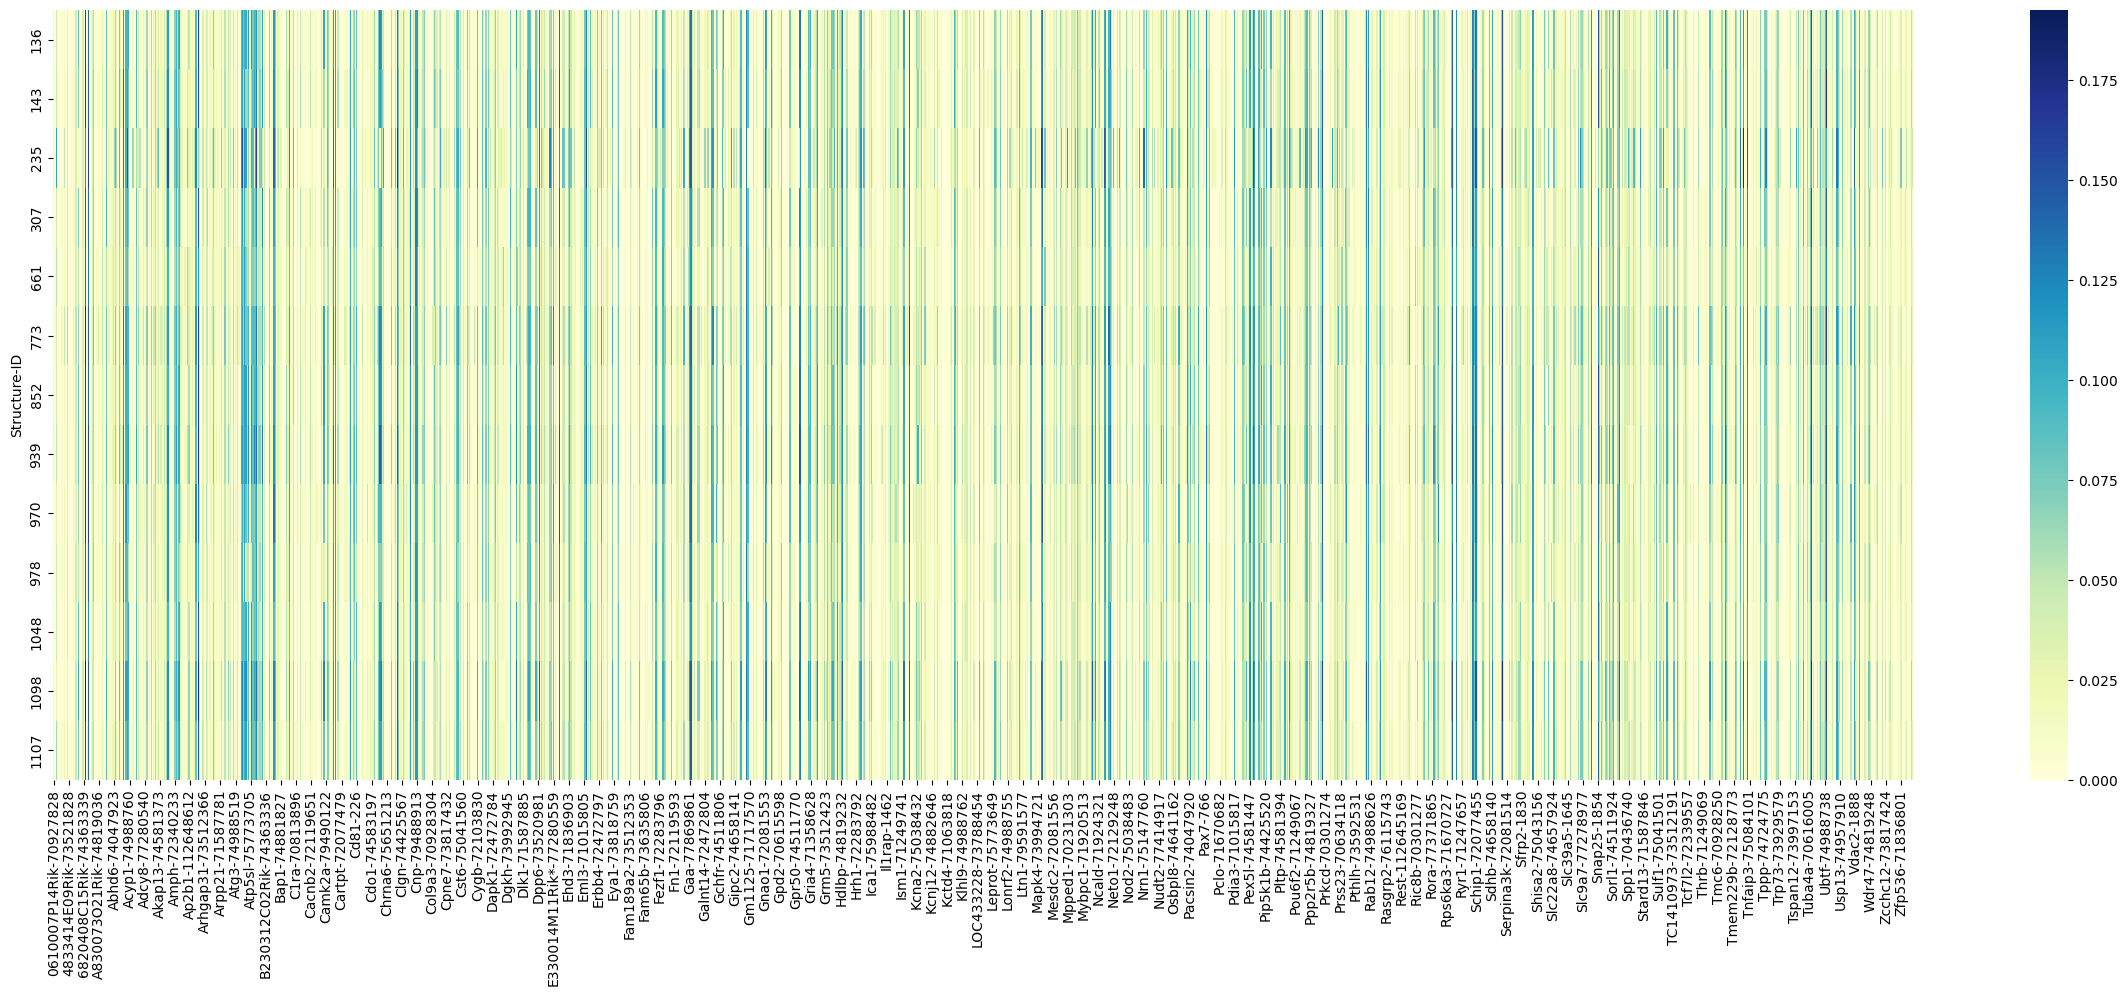

In [84]:
plt.subplots(figsize=(30,10))
# Create a custom colormap
custom_cmap = sns.color_palette("YlGnBu", as_cmap=True) #YlOrBr

# Sort the DataFrame based on desired order
sorted_df = cutOffGene04.groupby('Structure-ID').mean() #.sort_values(by= cutOffGene.all())

# mean of the density for each gene with a heat map
sns.heatmap(sorted_df, cmap=custom_cmap)
plt.show()

In [85]:
top5InfGene04 = round(cutOffGene04.groupby('Structure-ID').mean(), 3).apply(lambda x: x.nlargest(5), axis=1)
top5InfGene04

,8030498B09Rik-74958606,9530085C10Rik*-75080269,App-79591705,Ckb-70927826,Cnp-77371841,Eef2-67936204,Gprasp1-70743888,Itm2c-67936207,Matr3-67752309,Prkar1b-70616006,Rtn1-70928293,Serinc1-67752306,Snap25-1854,Tmsb10-73521810,Tubb2a-74819689,Uchl1-79556674
Structure-ID,,,,,,,,,,,,,,,,
136,0.162,NaN,0.160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.149,0.151,NaN,0.150,NaN
143,0.164,NaN,0.153,NaN,NaN,0.153,NaN,NaN,NaN,NaN,NaN,0.149,NaN,NaN,NaN,0.171
235,NaN,0.162,NaN,0.172,NaN,NaN,NaN,NaN,0.163,NaN,NaN,0.165,NaN,0.179,NaN,NaN
307,0.149,NaN,0.152,NaN,NaN,0.143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.147,0.144
661,0.137,0.130,NaN,NaN,0.129,NaN,NaN,NaN,NaN,NaN,NaN,0.130,0.146,NaN,NaN,NaN
773,0.178,NaN,0.157,NaN,NaN,NaN,NaN,0.160,NaN,NaN,NaN,0.152,NaN,NaN,NaN,0.166
852,0.164,NaN,0.166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.148,0.154,NaN,0.148,NaN
939,0.172,0.157,0.171,NaN,NaN,NaN,0.155,NaN,NaN,0.154,NaN,NaN,NaN,NaN,NaN,NaN
970,0.170,0.158,NaN,NaN,NaN,0.153,NaN,0.151,NaN,NaN,NaN,0.156,NaN,NaN,NaN,NaN


In [98]:
# get th column names of the top5 genes for the structures
colsTot = []
for i in top5InfGene04.columns:
    colsTot.append(i)

colsTot

['8030498B09Rik-74958606',
 '9530085C10Rik*-75080269',
 'App-79591705',
 'Ckb-70927826',
 'Cnp-77371841',
 'Eef2-67936204',
 'Gprasp1-70743888',
 'Itm2c-67936207',
 'Matr3-67752309',
 'Prkar1b-70616006',
 'Rtn1-70928293',
 'Serinc1-67752306',
 'Snap25-1854',
 'Tmsb10-73521810',
 'Tubb2a-74819689',
 'Uchl1-79556674']

In [104]:
# pull only those genes from the mean dataset
new04Mean_df = mean_df[colsTot]
new04Mean_df

,8030498B09Rik-74958606,9530085C10Rik*-75080269,App-79591705,Ckb-70927826,Cnp-77371841,Eef2-67936204,Gprasp1-70743888,Itm2c-67936207,Matr3-67752309,Prkar1b-70616006,Rtn1-70928293,Serinc1-67752306,Snap25-1854,Tmsb10-73521810,Tubb2a-74819689,Uchl1-79556674
Structure-ID,,,,,,,,,,,,,,,,
136,0.162138,0.137110,0.159515,0.132100,0.110129,0.138368,0.130726,0.136536,0.112983,0.144006,0.141559,0.149417,0.151172,0.113202,0.150314,0.140525
143,0.164351,0.143581,0.152696,0.131224,0.115681,0.153042,0.118492,0.139322,0.110434,0.142446,0.146416,0.148931,0.149360,0.101801,0.141794,0.170619
235,0.122614,0.162214,0.066939,0.172051,0.117337,0.115816,0.039213,0.114417,0.162912,0.146800,0.140694,0.165017,0.061256,0.178544,0.095823,0.103230
307,0.148785,0.137200,0.151504,0.121843,0.129774,0.142847,0.123832,0.123237,0.090012,0.126525,0.136365,0.126010,0.119340,0.101896,0.147499,0.143675
661,0.137228,0.129714,0.115155,0.113677,0.128916,0.126661,0.087636,0.107000,0.085899,0.122848,0.120123,0.129758,0.145989,0.071013,0.125879,0.119459
773,0.178260,0.141434,0.157004,0.109207,0.109948,0.130090,0.128025,0.159877,0.125395,0.139854,0.139607,0.151932,0.118328,0.099130,0.150025,0.165653
852,0.164283,0.139145,0.165974,0.128475,0.110577,0.133149,0.136583,0.128864,0.104018,0.140195,0.143033,0.147844,0.154017,0.111598,0.147682,0.141091
939,0.172350,0.156903,0.171005,0.144438,0.115360,0.152279,0.154548,0.134313,0.111656,0.154216,0.148892,0.151832,0.141223,0.118434,0.147290,0.153191
970,0.170098,0.158037,0.135004,0.105186,0.104551,0.152989,0.114331,0.150788,0.110486,0.143848,0.114547,0.155698,0.136867,0.082458,0.137352,0.143254


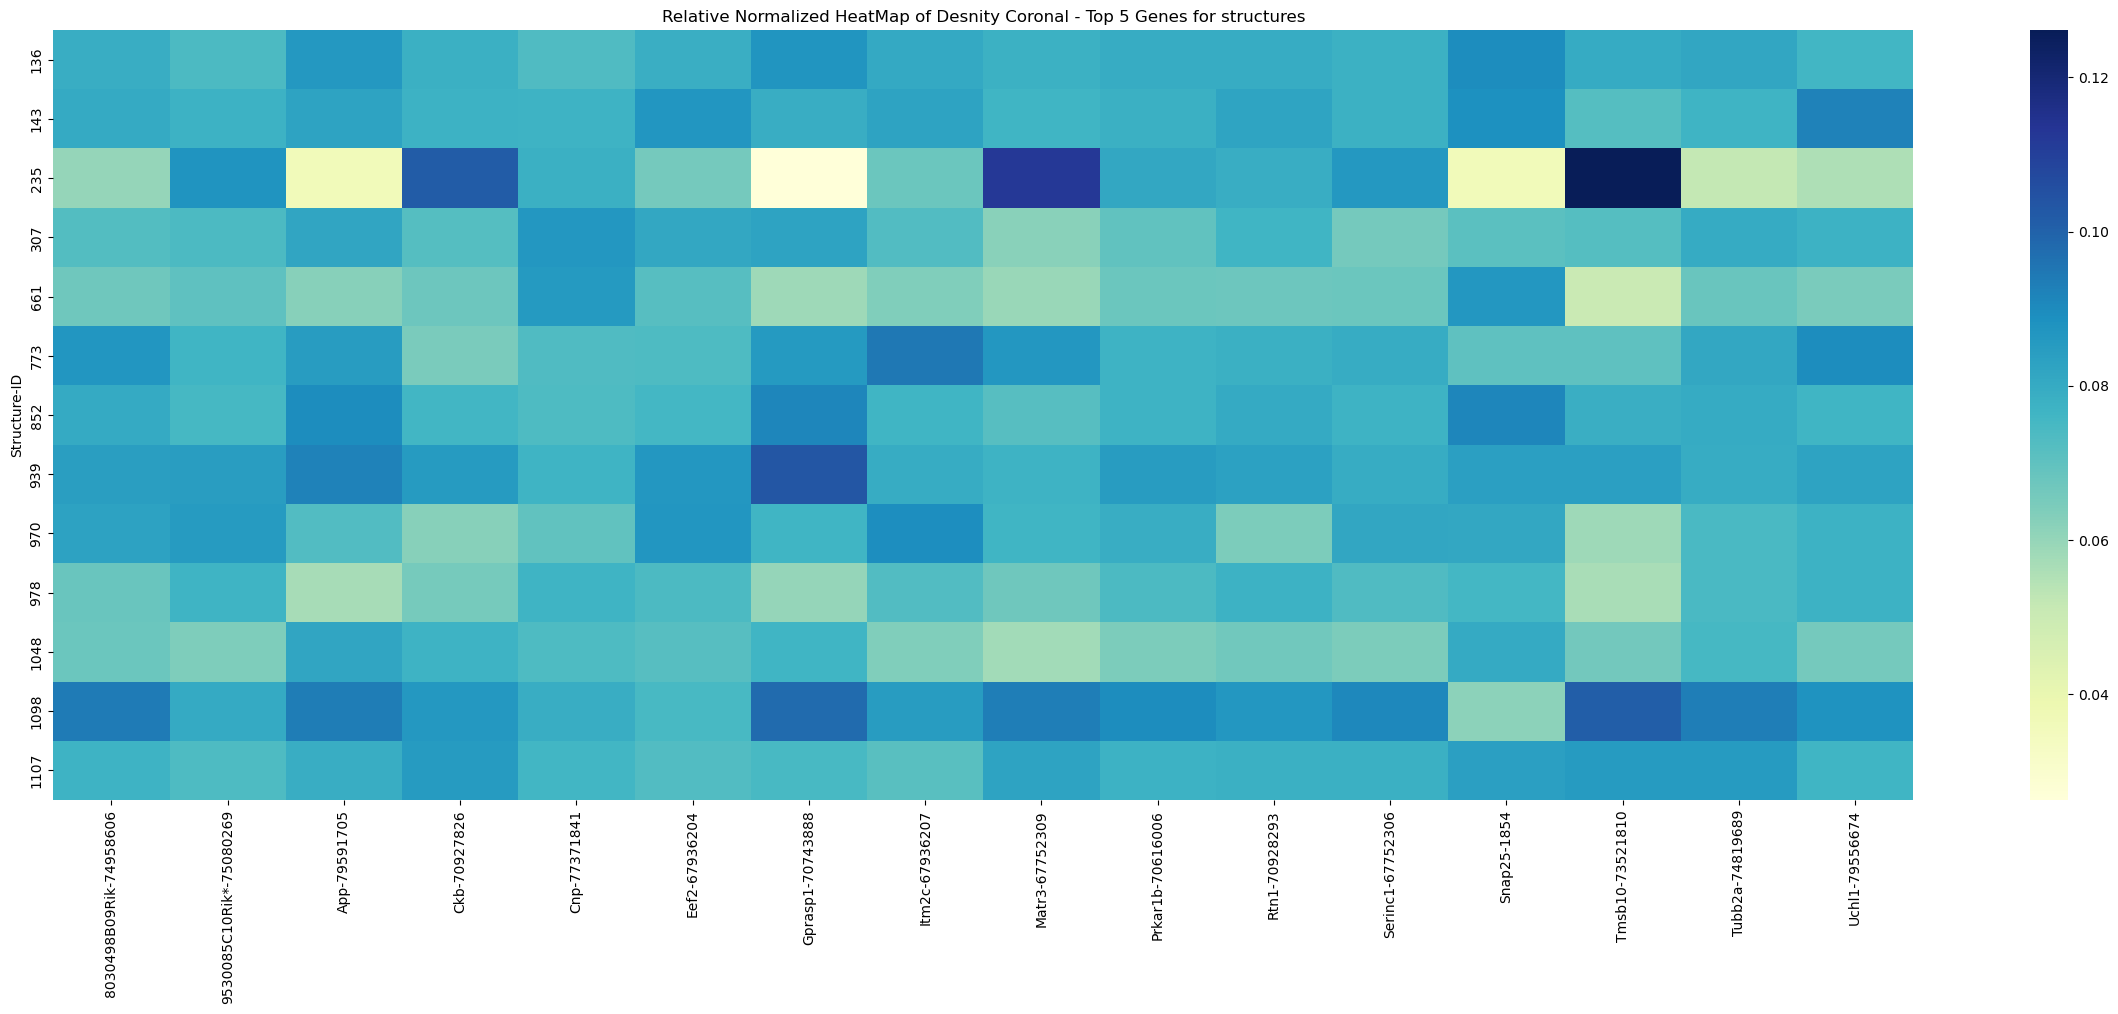

In [108]:
# plot the relative normalized data on a heat map
norm_data_tp5_col = new04Mean_df.copy()

for i in norm_data_tp5_col.columns:
    norm_data_tp5_col[i] = norm_data_tp5_col[i] / norm_data_tp5_col[i].sum()
    
plt.subplots(figsize=(30,10))

#norm_data_tp5 = norm_data_tp5.sort_values(by=136,axis=1,ascending=False)

# Create a custom colormap
custom_cmap = sns.color_palette("YlGnBu", as_cmap=True) #YlOrBr

#srt_mean_df = mean_df.iloc[np.argsort(mean_df.values, axis=1)]

# mean of the density for each gene with a heat map
sns.heatmap(norm_data_tp5_col, cmap=custom_cmap)
plt.title("Relative Normalized HeatMap of Desnity Coronal - Top 5 Genes for structures")
plt.show()

In [86]:
#top5InfGene04.to_csv('Top5InfGene04.csv', index=True)

In [87]:
#cutOffGene04.groupby('Structure-ID')['8030498B09Rik-74958606'].mean().max()

In [88]:
#cutOffGene.groupby('Structure-ID')['Snap25-1854'].mean().max()

### Principal Factor analysis

In [89]:
# from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
# chi_square_value,p_value=calculate_bartlett_sphericity(dCor)
# chi_square_value, p_value

In [90]:
# from factor_analyzer.factor_analyzer import calculate_kmo
# kmo_all,kmo_model=calculate_kmo(dCor)
# kmo_all,kmo_model

#### Both the Sphericity test and adequacy test above are failing

### K Means of 19 Components

In [91]:
# kmeans = KMeans(n_clusters=2, random_state=0, max_iter=500).fit(pca_PC[:,:19])  # initially checking for 2 clusters
# label = kmeans.labels_
# label

In [92]:
# plt.scatter(pca_PC[:, 0], pca_PC[:, 1], c=label)
# plt.title("Predicted Labels")

# plt.show()

In [93]:
# plt.scatter(pca_PC[:, 1], pca_PC[:, 2], c=label)
# plt.title("Predicted Labels")
# plt.show()

In [94]:
# from scipy.spatial import ConvexHull
# def drawclusters(ax):
#     for i in range(ncluster):
#         points = X[y == i]
#         ax.scatter(points[:, 0], points[:, 1], s=100, c=col[i], label=f'Cluster {i + 1}')
#         hull = ConvexHull(points)
#         vert = np.append(hull.vertices, hull.vertices[0])  # close the polygon by appending the first point at the end
#         ax.plot(points[vert, 0], points[vert, 1], '--', c=col[i])
#         ax.fill(points[vert, 0], points[vert, 1], c=col[i], alpha=0.2)
#     ax.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids', marker='x')

# X= pca_PC[:,:19]
# col = ['blue', 'green']
# ncluster = 2
# y = kmeans.labels_
# centroids = kmeans.cluster_centers_
# fig, ax = plt.subplots(1, figsize=(7, 5))
# drawclusters(ax)
# ax.legend()
# plt.tight_layout()
# plt.show()

In [95]:
# K = np.arange(2,11,1)
# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=0).fit(pca_PC)
#     labels_k = kmeans.predict(pca_PC)
#     plt.scatter(pca_PC[:, 0], pca_PC[:, 1], c=labels_k)
#     plt.title("Predicted Labels at K ="+ str(k))
#     plt.show()